# Iris Data – Data Mining

## Importing the libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [61]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [62]:
data = pd.read_csv('Iris.csv')

In [63]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
data = data.drop('Id', axis=1)

In [65]:
X = data.drop('Species', axis=1)
y = data['Species']

In [66]:
# X, y = load_iris(return_X_y=True)

In [67]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)
print(encoded_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [82]:
y = np.array(encoded_labels)

In [83]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Clustering

In [70]:
from sklearn.cluster import KMeans

In the context of k-means clustering, inertia represents the sum of squared distances of all data points to their closest cluster center.

The k-means algorithm aims to minimize this inertia value by iteratively adjusting the cluster centers to find the best clustering solution. The lower the inertia, the better the clusters are at capturing the data patterns. So, by appending kmeans.inertia_ to the Sum_of_Squared_distances list, the code is storing the inertia values for different iterations or values of k (number of clusters) in order to analyze and evaluate the quality of the clustering solution.

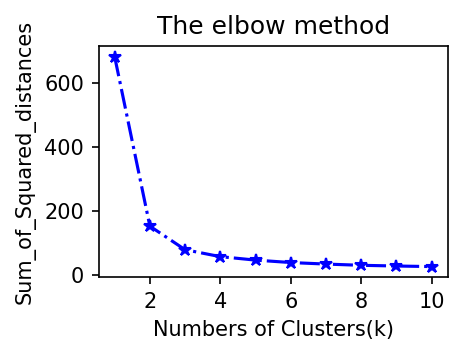

In [84]:
Sum_of_Squared_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    Sum_of_Squared_distances.append(kmeans.inertia_)
    
plt.figure(figsize=(3,2), dpi=150)
plt.plot(range(1, 11), Sum_of_Squared_distances, 'b*-.')
plt.title('The elbow method')
plt.xlabel('Numbers of Clusters(k)')
plt.ylabel('Sum_of_Squared_distances')
plt.show()

In [85]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [86]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [87]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

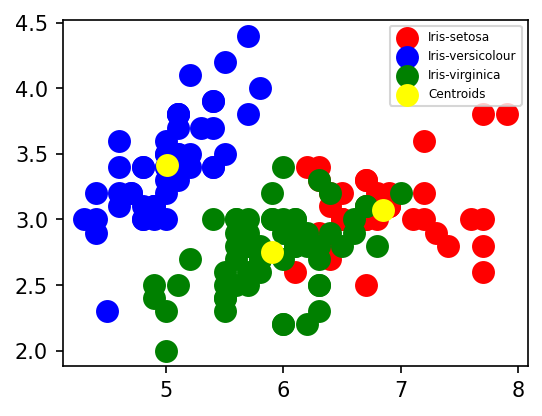

In [88]:
df = np.array(X)
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.legend(fontsize="xx-small")
plt.show()


In [76]:
# df = X
# plt.figure(figsize=(4,3), dpi=150)
# plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
# plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
# plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

# plt.legend(fontsize="xx-small")
# plt.show()

In [90]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.array(y), y_kmeans)
# print(accuracy)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 9.33%


In [98]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y,y_kmeans)

In [99]:
confusion_mat   

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]], dtype=int64)

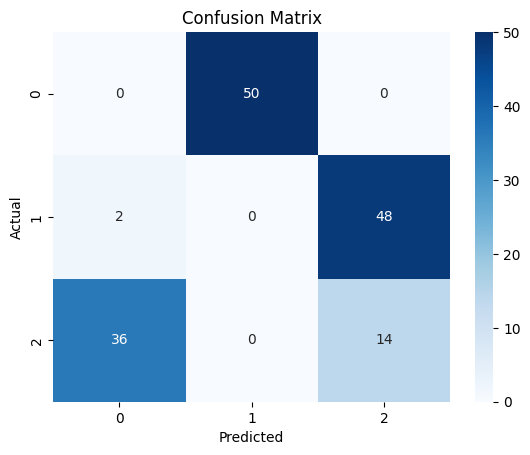

In [100]:
fig,ax = plt.subplots()
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

## Theory
Data mining is the process of discovering patterns, relationships, and insights from large sets of data. It involves extracting valuable information and knowledge from vast amounts of data to uncover hidden patterns, trends, and relationships that can be used for decision-making, prediction, and optimization.
The goal of data mining is to extract useful and actionable knowledge from complex and often large datasets.

## K Means
K-means clustering is a popular unsupervised machine learning algorithm used for clustering or grouping similar data points together. Here's an explanation of the K-means clustering algorithm:

Choose the number of clusters (K): First, you need to determine the number of clusters you want to create. This value of K is typically predefined based on prior knowledge or by using techniques like the elbow method.

Initialize cluster centroids: Randomly select K data points from the dataset as initial cluster centroids. These centroids represent the centers of the clusters.

Assign data points to clusters: For each data point in the dataset, calculate its distance to each of the K centroids. Assign the data point to the cluster whose centroid is closest to it. This step creates initial clusters.

Update cluster centroids: After assigning data points to clusters, compute the new centroids for each cluster by calculating the mean of the data points assigned to that cluster.

Repeat steps 3 and 4: Iterate steps 3 and 4 until convergence. In each iteration, data points are reassigned to the nearest centroid, and centroids are updated. Convergence occurs when the centroids no longer change significantly or when a maximum number of iterations is reached.

Output the clusters: Once the algorithm converges, the final centroids represent the centers of the clusters. Each data point is assigned to the cluster with the nearest centroid. The algorithm outputs the clusters and their corresponding data points.

The K-means clustering algorithm aims to minimize the sum of squared distances between data points and their assigned cluster centroids. The resulting clusters are compact and well-separated from each other.

It's worth noting that K-means clustering is sensitive to the initial placement of centroids and may converge to different solutions for different initializations. To mitigate this, the algorithm is often run multiple times with different initializations, and the solution with the lowest sum of squared distances is chosen as the final clustering result.

K-means clustering is widely used for customer segmentation, image compression, anomaly detection, and many other applications where grouping similar data points together is important.




